# Analyzing Earthquakes

# This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965. Lets conduct an EDA on the dataset and try to uncover meaningful and/or interesting insights from the dataset.

# Calling libraries

In [1]:
from numpy import *
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

Reading in data and looking at the number of rows and columns using shape function

In [4]:
NEIC = pd.read_csv('earthquake.csv',sep = ',')
NEIC.shape

(23412, 21)

In [5]:
NEIC.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Lets use the describe() function to get various summary statistics that exclude NaN values¶

In [6]:
NEIC.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


# There are lot of variables seems carrying lots of missing values. we can remove some of them as they looks like not useful

In [7]:
NEIC = NEIC.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square'],1)

In [8]:
NEIC.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Identifying the unique factors of Earthquakes¶

In [9]:
print(unique(NEIC.Type))
print(NEIC['Magnitude Type'].unique())

['Earthquake' 'Explosion' 'Nuclear Explosion' 'Rock Burst']
['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' nan 'MWB' 'MWW' 'MWR']


# Lets identify the minimum, maximum and average of the Magnitude of the earthquake

In [10]:
minimum=NEIC["Magnitude"].min()
maximum=NEIC["Magnitude"].max()
average=NEIC["Magnitude"].mean()

print("Minimum: " ,minimum)
print("Maximum: " ,maximum)
print("Average: " ,average)

Minimum:  5.5
Maximum:  9.1
Average:  5.882530753460003


# finding Highly effected areas , assuming the one with Magnitude >8

In [11]:
highly_effected=NEIC[NEIC["Magnitude"]>=8]
print(highly_effected)

             Date      Time  Latitude  Longitude        Type   Depth  \
11     01/24/1965  00:11:17   -2.6080   125.9520  Earthquake   20.00   
16     02/04/1965  05:01:22   51.2510   178.7150  Earthquake   30.30   
538    10/17/1966  21:42:00  -10.6650   -78.2280  Earthquake   40.00   
911    05/16/1968  00:49:02   40.8600   143.4350  Earthquake   29.90   
1663   07/31/1970  17:08:05   -1.5970   -72.5320  Earthquake  644.80   
1983   07/14/1971  06:11:30   -5.5240   153.8500  Earthquake   40.00   
2008   07/26/1971  01:23:22   -4.8170   153.1720  Earthquake   40.00   
2530   12/02/1972  00:19:52    6.4050   126.6400  Earthquake   60.00   
3770   01/14/1976  16:47:34  -28.4270  -177.6570  Earthquake   33.00   
7415   03/03/1985  22:47:07  -33.1350   -71.8710  Earthquake   33.00   
7699   09/19/1985  13:17:47   18.1900  -102.5330  Earthquake   27.90   
7959   05/07/1986  22:47:11   51.5200  -174.7760  Earthquake   33.00   
9484   05/23/1989  10:54:46  -52.3410   160.5680  Earthquake   1

# Lets find out the number of earthquake and the Intensity

In [12]:
def f(x):
    return Series(dict(Number_of_earthquakes = x['ID'].count(),
                       Intensity = x['Magnitude'].mean()
                       ))
f(NEIC)

Number_of_earthquakes    23412.000000
Intensity                    5.882531
dtype: float64

# Lets find out the number of earthquake and its intensity according to the Type of disaster

In [14]:
Earthquake_by_type = NEIC.groupby('Type').apply(f)
Earthquake_by_type

,Number_of_earthquakes,Intensity
Type,,
Earthquake,23232.0,5.882763
Explosion,4.0,5.850000
Nuclear Explosion,175.0,5.850686
Rock Burst,1.0,6.200000


# importing module for handling date object

In [15]:
import datetime as dt

# Check for 'dtype' of Date

In [16]:
NEIC.dtypes

Date                 object
Time                 object
Latitude            float64
Longitude           float64
Type                 object
Depth               float64
Magnitude           float64
Magnitude Type       object
ID                   object
Source               object
Location Source      object
Magnitude Source     object
Status               object
dtype: object

# Transforming Date from miscellaneous objects to datetime class

In [17]:
NEIC['Date'] = pd.to_datetime(NEIC['Date'])

# set Date column as index

In [18]:
NEIC = NEIC.set_index(['Date']) #sets 'Date' as index
NEIC.head(2)

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,
1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic


# Populate the number of Earthquakes by Weekday

In [19]:
Earthquake_by_weekday = NEIC.groupby(NEIC.index.weekday).apply(f)
print(len(Earthquake_by_weekday))
Earthquake_by_weekday

7


,Number_of_earthquakes,Intensity
Date,,
0,3349.0,5.896503
1,3244.0,5.874220
2,3431.0,5.888968
3,3306.0,5.875430
4,3362.0,5.874450
5,3433.0,5.881072
6,3287.0,5.886708


# Populate the number of Earthquakes by Week

In [20]:
Earthquake_by_week = NEIC.groupby(NEIC.index.week).apply(f)
print(len(Earthquake_by_week))
Earthquake_by_week

53


,Number_of_earthquakes,Intensity
Date,,
1,424.0,5.888302
2,400.0,5.851500
3,475.0,5.880779
4,420.0,5.841667
5,451.0,5.881175
6,414.0,5.898551
7,451.0,5.860333
8,465.0,5.859785
9,438.0,5.913950


In [21]:
Weekly_dist = Earthquake_by_week['Number_of_earthquakes'].plot(kind = 'line')

# Populate the number of Earthquakes by Month

In [22]:
Earthquake_by_month = NEIC.groupby(NEIC.index.month).apply(f)
print(len(Earthquake_by_month))
Earthquake_by_month

12


,Number_of_earthquakes,Intensity
Date,,
1,1891.0,5.874849
2,1829.0,5.877037
3,2114.0,5.874598
4,1971.0,5.897260
5,1964.0,5.890214
6,1824.0,5.874271
7,1880.0,5.885883
8,2014.0,5.894374
9,1985.0,5.873804


# Lets plot a bar graph for the number of earthquakes

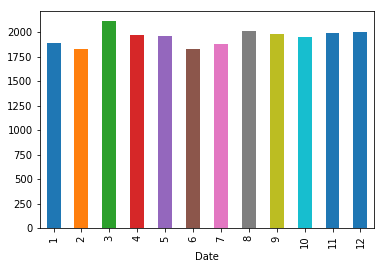

In [23]:
Monthly_dist = Earthquake_by_month['Number_of_earthquakes'].plot(kind = 'bar')

# maximum number of population by state (not finished)

In [24]:
m=NEIC.groupby('Magnitude')
m=m['Longitude'].sum()
m.sort_values(ascending=False)
#Maharashtra has maximum number of population

Magnitude
5.50    162972.307333
5.60    136148.551767
5.70    121616.348400
5.80     93808.655767
5.90     88695.112367
6.00     59347.101167
6.10     55975.397033
6.20     39406.524067
6.30     37837.574467
6.40     25291.700400
6.80     16541.196633
6.60     15975.175200
6.50     15773.142900
6.70     14916.183300
7.10      8969.789700
7.00      8899.215667
6.90      7135.455567
7.50      4203.314100
7.30      3923.067000
7.20      3142.271100
7.40      3084.529500
7.60      2569.285500
7.70      2183.275000
7.90      1547.003800
7.80      1356.916900
8.30       526.043600
8.10       525.288000
8.20       521.047900
9.10       238.355000
8.60       190.171000
            ...      
5.72      -115.911333
5.69      -116.403000
5.62      -116.408333
5.63      -116.455667
5.81      -116.488333
5.54      -116.534167
5.53      -116.852000
5.94      -116.968000
5.51      -117.697000
5.89      -118.493000
5.58      -118.698000
6.47      -118.750000
6.31      -118.755167
5.97      -120.366000


# Populate the number of Earthquakes by Year

In [28]:
Earthquake_by_year = NEIC.groupby(NEIC.index.year).apply(f)
print(len(Earthquake_by_year))
Earthquake_by_year

52


,Number_of_earthquakes,Intensity
Date,,
1965,339.0,6.014159
1966,234.0,6.040470
1967,255.0,6.003922
1968,305.0,6.078525
1969,323.0,6.009350
1970,345.0,6.035768
1971,386.0,5.972539
1972,388.0,5.943814
1973,401.0,5.814065


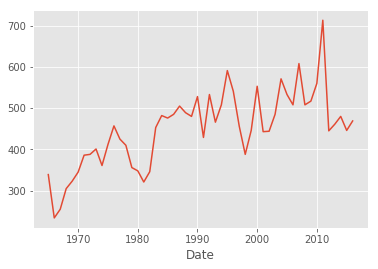

In [29]:
Yearly_dist = Earthquake_by_year['Number_of_earthquakes'].plot(kind = 'line')

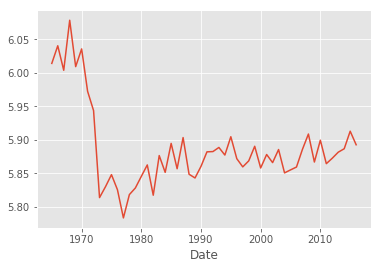

In [30]:
Yearly_dist = Earthquake_by_year['Intensity'].plot(kind = 'line')

# House Prices Analysis¶

# Objective of the study is to perform EDA for the variables which will help later to build model later to predict the area which might get affected. 

# Calling libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler #for pre-processing
from scipy import stats
import warnings #import warnings
warnings.filterwarnings('ignore') #ignoring the warnings
%matplotlib inline

# Reading in data 

In [3]:
df_train = pd.read_csv('house_train.csv')

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.info() #knowing the shape, columns and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Looking at the number of rows and columns using shape function¶

In [7]:
df_train.shape

(1460, 81)

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Histogram for Saleprice

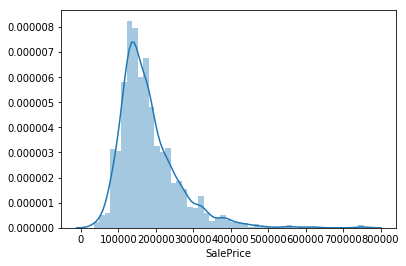

In [9]:
sns.distplot(df_train['SalePrice']);

# skewness and kurtosis of Saleprice

In [10]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Let us do some bivariate analysis to see which variables might be good for predicting sales price

# box plot overallqual/saleprice

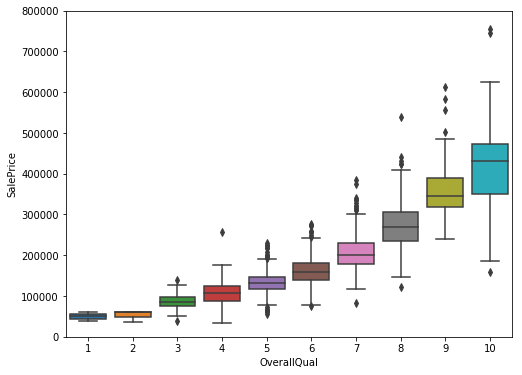

In [11]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6)) #creates a structure to accumulate the plots given after subplot, figsize = (width,height)
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

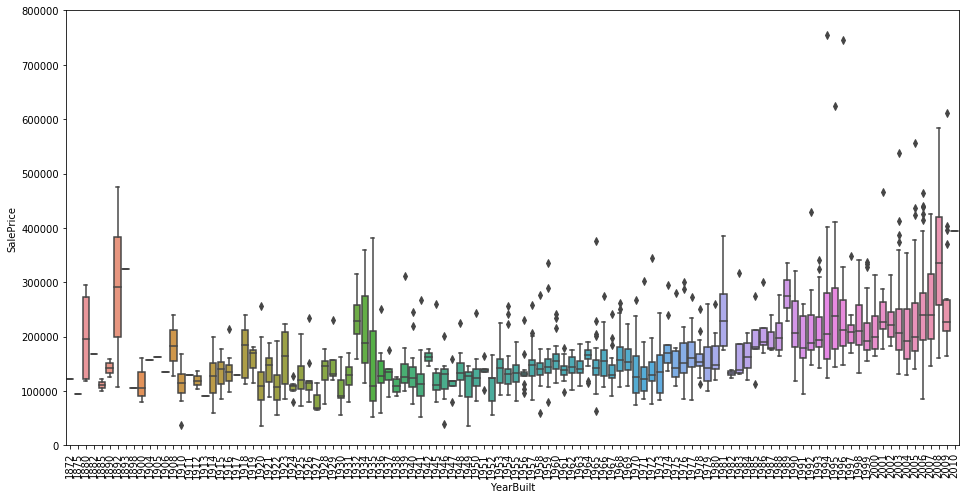

In [12]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# correlation matrix

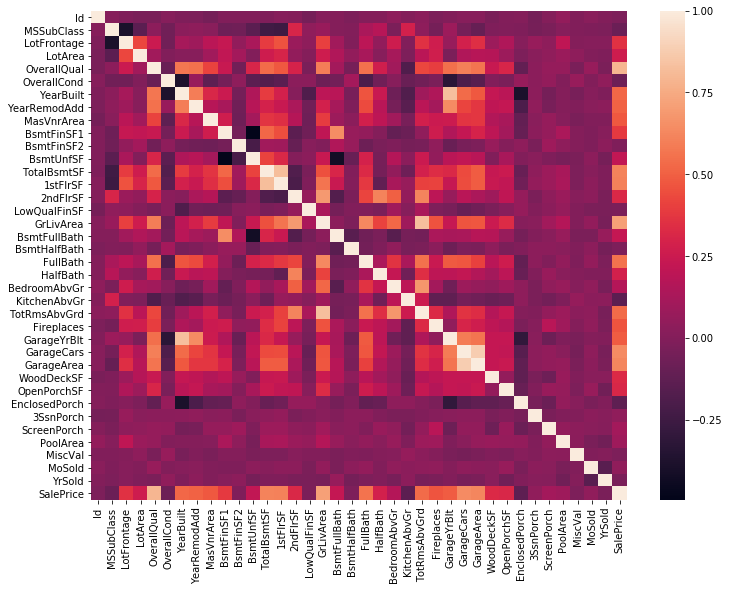

In [13]:
corrmat = df_train.corr() #multi-variate analysis
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)

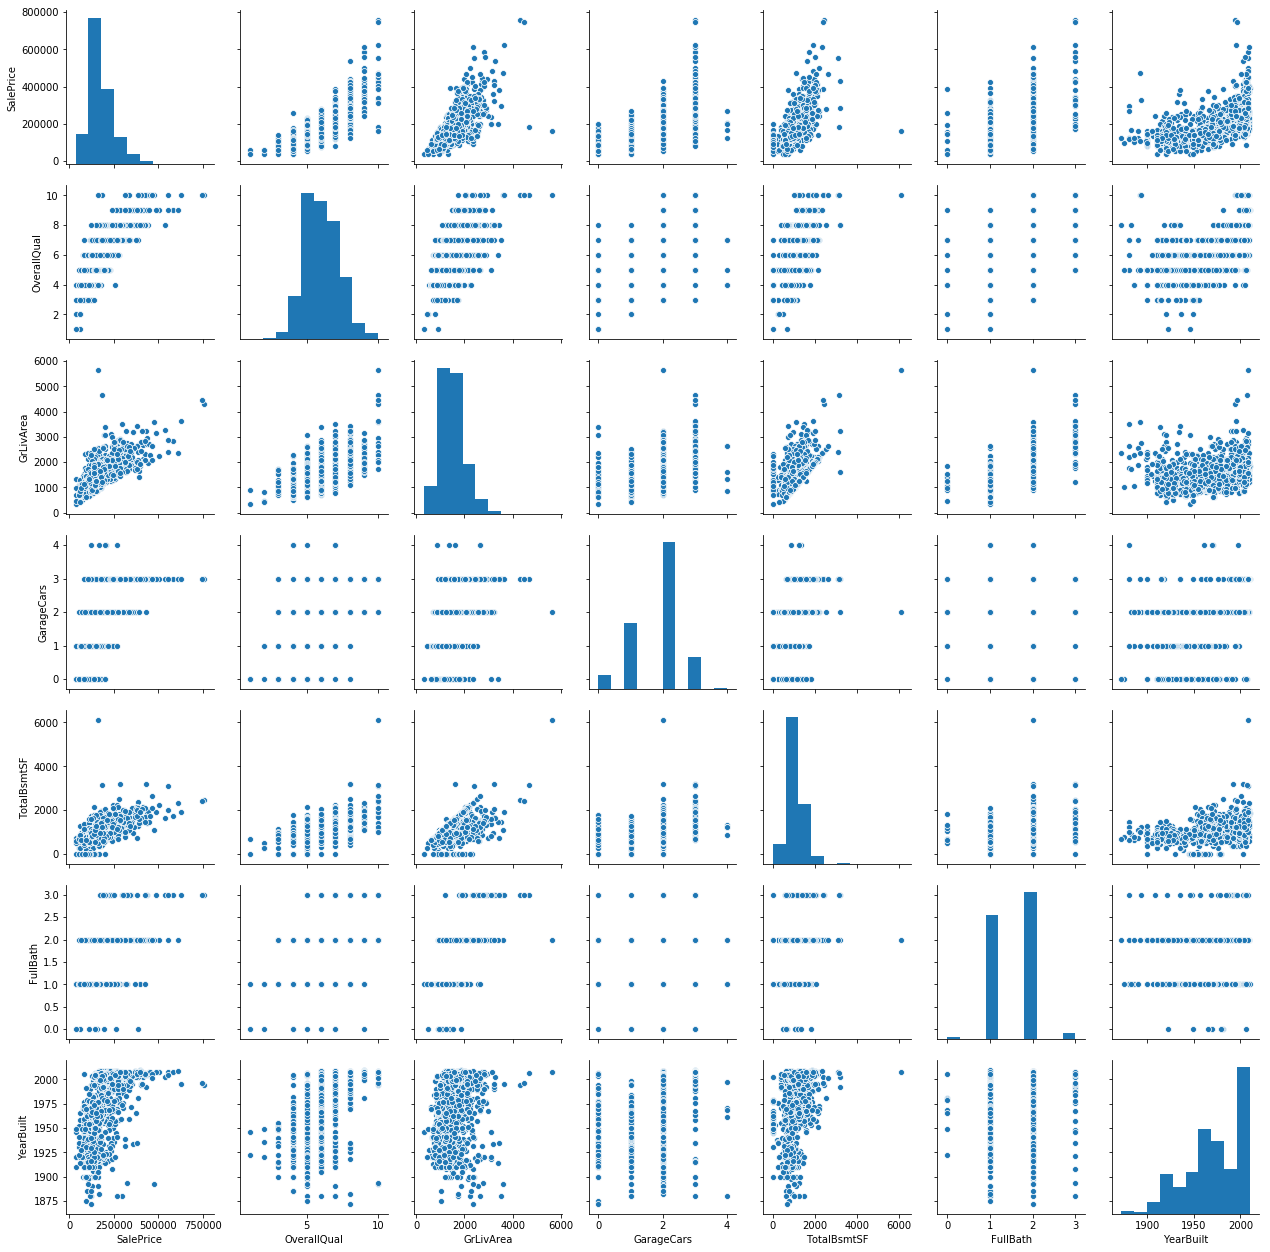

In [14]:
#Let us make this a bit better
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5) #pairplot used for multivariate analysis
plt.show();

In [15]:
corr=df_train.corr()["SalePrice"]
corr

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

# Plotting correlations

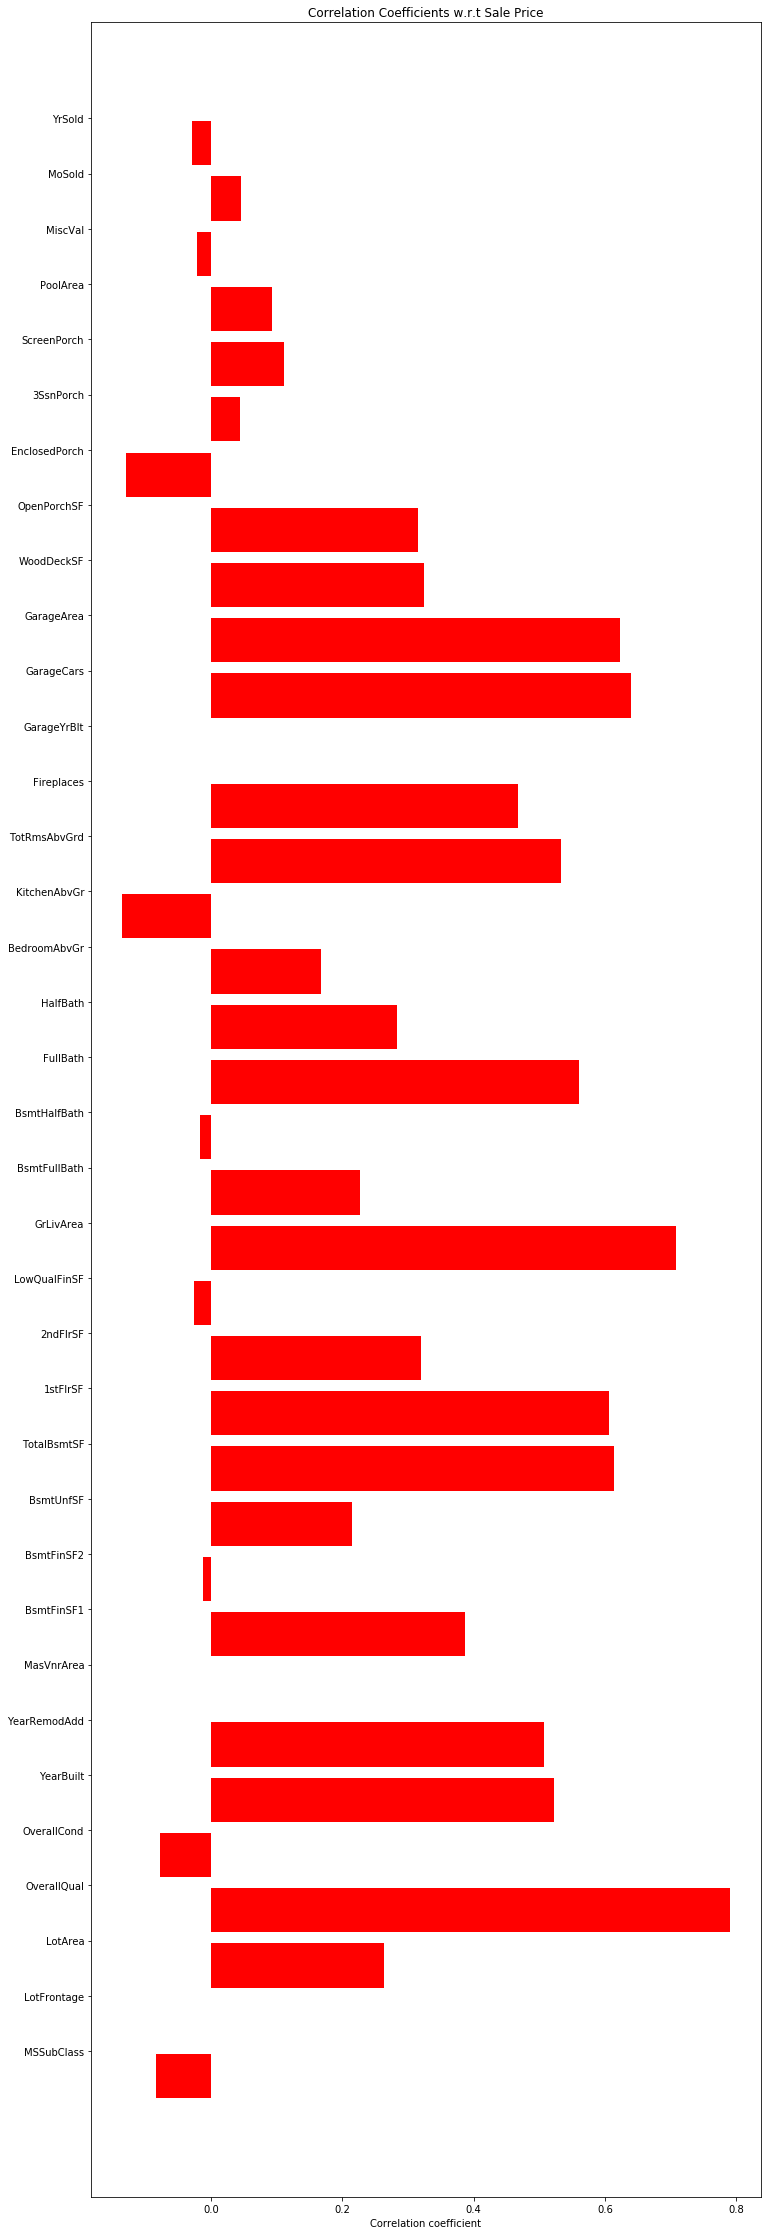

In [16]:
num_feat=df_train.columns[df_train.dtypes!=object] #selecting columns excluding object type columns
num_feat=num_feat[1:-1] # id and salesprice is skipped
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df_train[col].values, df_train.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

# Some data transformations
# histogram and normal probability plot

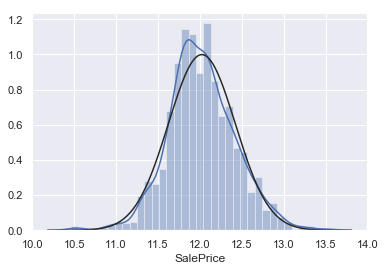

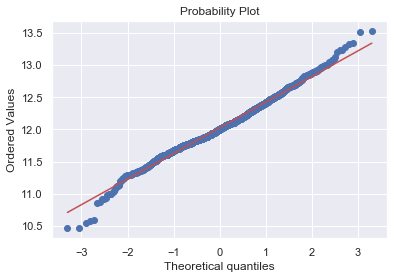

In [17]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# Applying log transformation

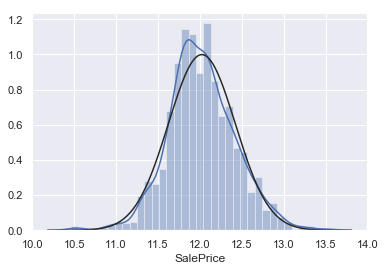

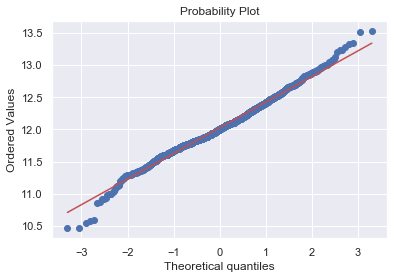

In [15]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# Histogram and normal probability plot

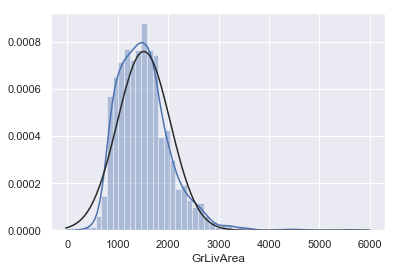

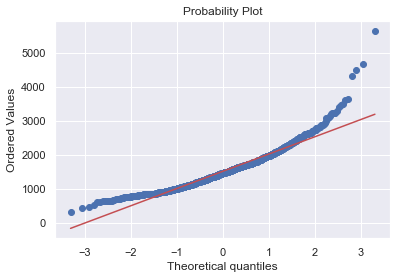

In [18]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

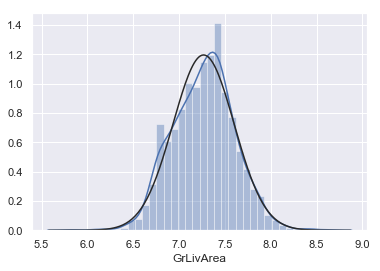

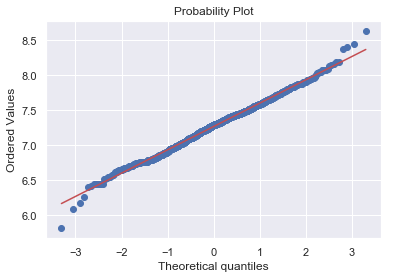

In [19]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

# Histogram and normal probability plot

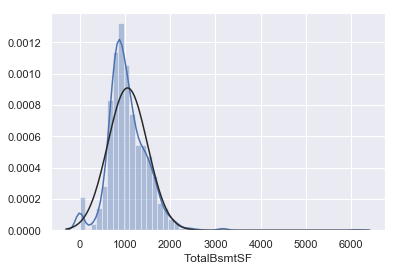

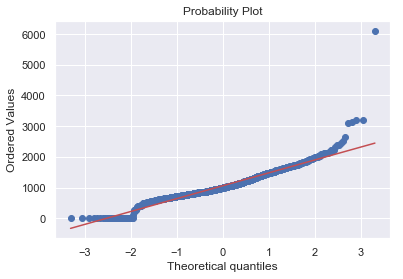

In [20]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)


# How about missing values

In [21]:
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Bi-variate analysis

In [22]:
df_train['LotFrontage'].corr(df_train['LotArea'])

0.4260950187718079

In [23]:
df_train['SqrtLotArea']=np.sqrt(df_train['LotArea'])
df_train['LotFrontage'].corr(df_train['SqrtLotArea'])

0.6020022167939362

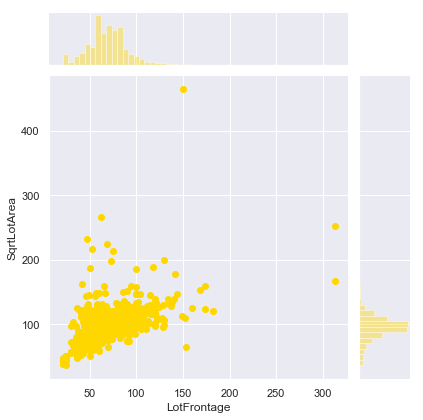

In [24]:
sns.jointplot(df_train['LotFrontage'],df_train['SqrtLotArea'],color='gold');

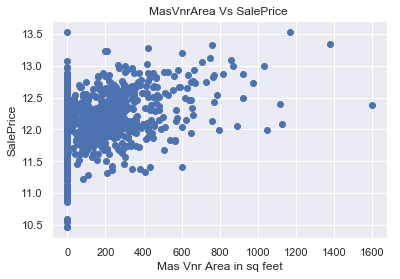

In [25]:
plt.scatter(df_train["MasVnrArea"],df_train["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");

# Basement variable

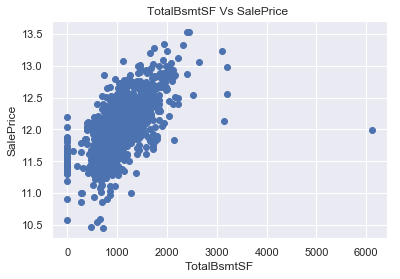

In [26]:
plt.scatter(df_train["TotalBsmtSF"],df_train["SalePrice"])
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("TotalBsmtSF");

# Treatment of outliers
# there are few outliers in total basement area lets remove them

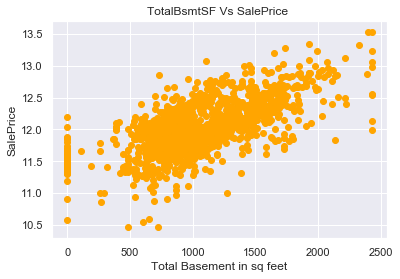

In [27]:
upperlimit = np.percentile(df_train.TotalBsmtSF.values, 99.5)
df_train['TotalBsmtSF'].ix[df_train['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(df_train.TotalBsmtSF, df_train["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

# Dealing with categorical variables

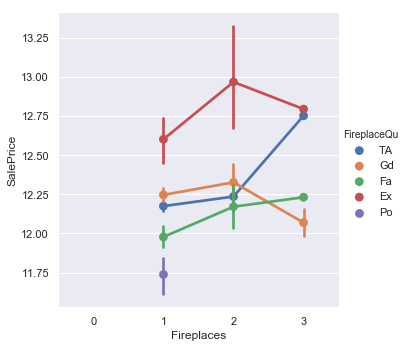

In [28]:
#no. of fireplaces and how the houses are affected by fireplaces
sns.factorplot("Fireplaces","SalePrice",data=df_train,hue="FireplaceQu"); #factorplot uses both categorical and numerical

# Does amount of 1st floor area help in sales price prediction ?

In [ ]:
plt.scatter(df_train["1stFlrSF"],df_train.SalePrice, color='red')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet");

# Create a new variables - sales price per sq ft

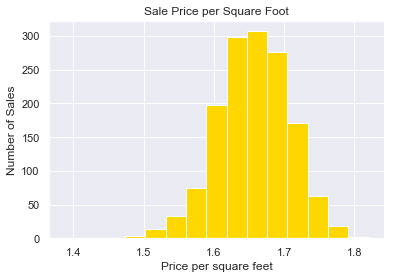

In [31]:
df_train['SalePriceSF'] = df_train['SalePrice']/df_train['GrLivArea']
plt.hist(df_train['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');